In [88]:
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn as nn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [89]:
iris = load_iris()

In [90]:
X = iris['data']
y= iris['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 1./3, random_state =1)

In [91]:
def normalize(X):
    return (X - np.mean(X)) / np.std(X)

In [92]:
X_train_norm = torch.from_numpy(normalize(X_train)).float()


In [93]:
y_train = torch.from_numpy(y_train)

In [94]:
train_ds = TensorDataset(X_train_norm, y_train)

In [95]:
torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

In [96]:
class Model(nn.Module):
    def __init__(self, input_size,hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self,x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)

        return x


In [97]:
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
model = Model(input_size,hidden_size,output_size)

In [98]:
model

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [99]:
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [100]:
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist[epoch] += loss.item()*y_batch.size(0) # <<--- loss per label
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float() #<--- tensor containing matches
        accuracy_hist[epoch] += is_correct.mean() #<--- Accuracy per mini batch
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)
    # if epoch % 10 == 0:
    #     print(f"Prediction is :: {pred}\n")
    #     print(f"y_batch is :: {y_batch}\n")
        


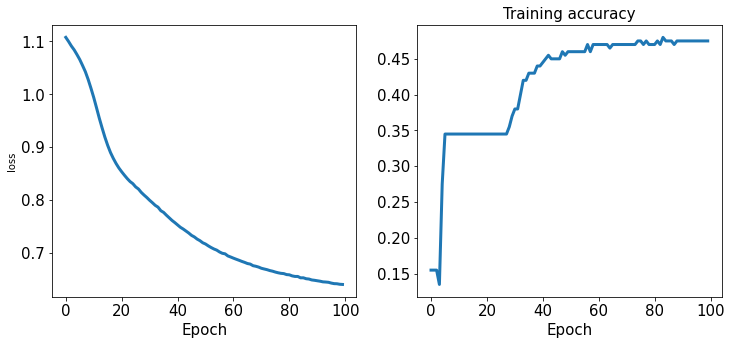

In [101]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,2,1)
ax.plot(loss_hist, lw=3)
ax.set_xlabel("Epoch",size=15)
ax.set_ylabel("loss")
ax.tick_params(axis="both",which="major",labelsize=15)
ax = fig.add_subplot(1,2,2)
ax.plot(accuracy_hist, lw=3)
ax.set_title("Training accuracy",size=15)
ax.set_xlabel("Epoch",size=15)
ax.tick_params(axis="both",which="major",labelsize=15)
plt.show()

In [102]:
X_test_norm = torch.from_numpy(normalize(X_test)).float()
y_test = torch.from_numpy(y_test)
pred_test = model(X_test_norm)
correct = (torch.argmax(pred_test,dim=1) == y_test).float()
accuracy = correct.mean()
print(f'Test acc is {accuracy}')

Test acc is 0.9800000190734863
